<a href="https://colab.research.google.com/github/hillerj1/PHY_310/blob/main/MonteCarloMethods_Minimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Methods and Minimization

## Library Imports Go Here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import csv
import mpmath

## Integration via Monte Carlo

### The Function

<font color = blue>
    
Construct a function that implements the Monte Carlo method of integration.  It should take as inputs the function `function`, the upper and lower limits of integration `x_initial` and `x_final`, the number of `darts` to be thrown, and the height of the box `height`.

In [ ]:
def mc(function, x_initial, x_final, darts, height):
    width = x_final - x_initial
    a_box = width * height
    m = 0
    for dart in range(darts):
        dart = np.array([np.random.uniform(x_initial, x_final), np.random.uniform(0, height)])
        if dart[1] < f(dart[0]):
            m = m + 1
    return (m/darts) * a_box

### Testing the Function

<font color = blue>
We will be testing the code on the function

$$
f(x) = \frac{x^2}{2}
$$

that we have now used several times, integrating over the familiar range $[-1, 3]$.

Begin by plotting the function over the integration region, and determining what an appropriate choice of `height` should be.

Now, because of the use of random numbers, the result of a Monte Carlo method calculation will vary slightly each time it's run.  Create an array of 10 separate outputs for the function, with N = 100.  Then repeat this with N = 1000, N = 10000, N = 100000, and N = 1000000.  (You may want to estimate how long this last one will take before executing it.)

**Discuss** your results.

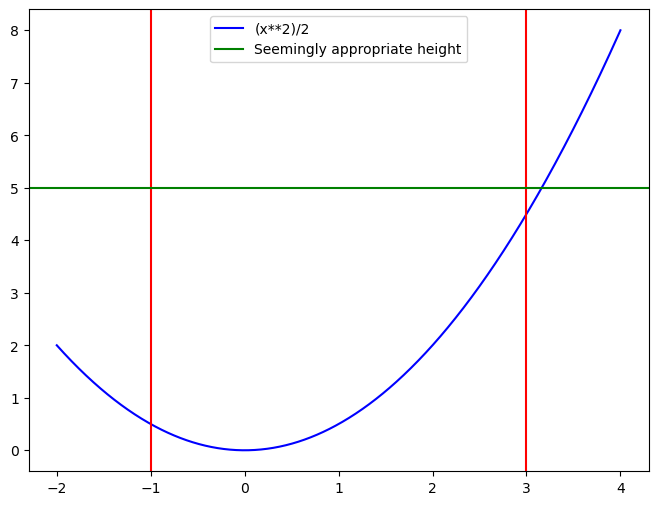

In [ ]:
def f(x):
    return (x**2)/2

x = np.linspace(-2, 4, 1000)
plt.figure(figsize = (8,6))
plt.plot(x, f(x), color = 'b', label = '(x**2)/2')
plt.axvline(x = -1, color = 'r')
plt.axvline(x = 3, color = 'r')
plt.axhline(y = 5, color = 'g', label = 'Seemingly appropriate height')
plt.legend()
plt.show()

In [ ]:
n_100 = np.array([0.00] * 10)
n_1000 = np.array([0.00] * 10)
n_10000 = np.array([0.00] * 10)
n_100000 = np.array([0.00] * 10)
n_1000000 = np.array([0.00] * 10)

for i in range(10):
    n_100[i] = mc(f, -1, 3, 100, 5)
for i in range(10):
    n_1000[i] = mc(f, -1, 3, 1000, 5)
for i in range(10):
    n_10000[i] = mc(f, -1, 3, 10000, 5)
for i in range(10):
    n_100000[i] = mc(f, -1, 3, 100000, 5)
for i in range(10):
    n_1000000[i] = mc(f, -1, 3, 1000000, 5)

print(f'N = 100: {n_100}')
print(f'N = 1000: {n_1000}')
print(f'N = 10000: {n_10000}')
print(f'N = 100000: {n_100000}')
print(f'N = 1000000: {n_1000000}')

N = 100: [4.6 4.6 3.2 5.  5.2 4.6 6.  4.8 5.8 6.2]
N = 1000: [5.16 4.96 4.14 4.68 4.52 4.22 4.6  4.36 4.52 4.68]
N = 10000: [4.668 4.59  4.648 4.68  4.624 4.738 4.754 4.69  4.744 4.644]
N = 100000: [4.6666 4.682  4.6816 4.6984 4.6678 4.6542 4.6432 4.6676 4.6686 4.6562]
N = 1000000: [4.67094 4.66834 4.66668 4.66478 4.67526 4.67578 4.66422 4.66182 4.6743
 4.67076]


When I increase the iterations/darts, the values become more precise and "zero in" on the solution. But since there is a random number inputted in each mc() function, none of the answers are really the same. Nonetheless, with the N values of 1000000, the 10 outputed values are extremly similar as they are the most precise values.

## Basic Rutherford Scattering

<font color = blue>
In Rutherford scattering (non-dimensionalized) we assume we begin with a uniform beam of particles of total radius $B$, all at the same speed $v_0 = 1$.  Each particle in the beam can be described by its impact parameter $b$, which determines at what angle $\Theta$ it will strike the detector:

$$
b = \cot\frac{\Theta}{2}, \hspace{.5in} \Theta = 2\cot^{-1} b
$$

The full beam will generate a distribution of strikes that *should* follow the pattern

$$
N(\Theta) \, d\Theta = \frac{N}{B^2} \frac{\cos\frac{\Theta}{2}}{\sin^3\frac{\Theta}{2}} \, d\Theta = \mbox{number of strikes in the range $[\Theta, \Theta + d\Theta]$}
$$

### The Incoming Beam

<font color = blue>
    
Create a function that generates a simulation of a uniform beam of particles, with two inputs: the radious of the beam and the total number of particles in the beam.  The output should be an array of impact parameters.  Test your module by creating a histogram of the impact parameters of 100000 particles, where the beam radius is $B = 1$.  (The command `hist` in `matplotlib.pyplot` is what you're looking for.)

As a **discussion**, make a detailed, quantitative argument for what the shape of the histogram *should* be, and compare this with the histogram you obtained.  This argument should incorporate the effects of the "bin size" as well as the total number of particles.  

Hint: consider a thin annulus inside the beam of particles, with some inner radius $r$ and some width $w$.  How many particles do you expect to pass through it?

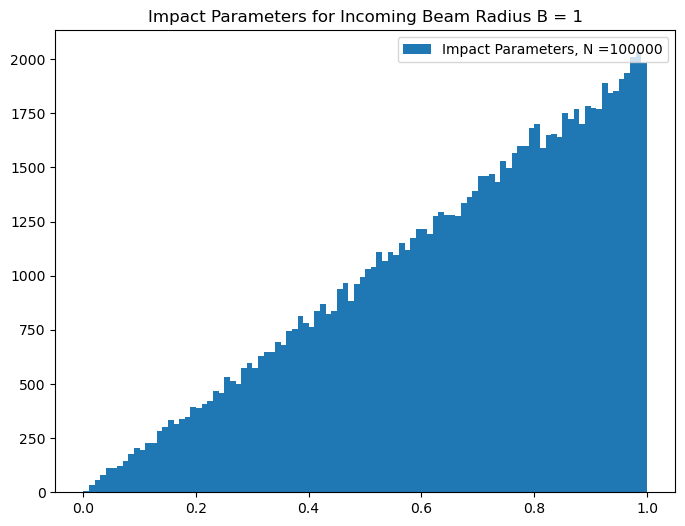

In [ ]:
def uniform(r, n):
    b_list = np.array([0.00] * n)
    i = 0
    while i < n :
        rand = np.array([np.random.uniform(-r, r), np.random.uniform(-r, r)])
        b = np.sqrt(rand[0]**2 + rand[1]**2)
        if b < r:
            b_list[i] = b
            i = i + 1

    return b_list

plt.figure(figsize = (8, 6))
plt.hist(uniform(1, 100000), 100, label = f'Impact Parameters, N ={100000}')
plt.title('Impact Parameters for Incoming Beam Radius B = 1')
plt.legend(loc = 'upper right')
plt.show()


Essentially the graph above is plotting the distance from the origin for each of N particles. I would expect this graph to be very linear because with N # of random points within the region, the expectation is that eventually the beam will fill up with particles. This idea translates to the graph that I created above! As the radius increases from 0 to 1, the impact parameters continue to increase since the points are filling in the region. for any r and n the histogram of impact parameters should be somewhat linear.

### * The Outgoing Distribution

<font color = blue>
    
Now create a function that uses the previous function to generate a list of final angles from a simulated Rutherford experiment.  This function should take the same inputs as the previous function: the radius of the incoming beam and the total number of particles.  Test the function with 100000 incoming particles and an incoming beam radius of $B = 10$, and (as a **discussion**) compare the shape of the histogram with the theoretical shape, including the minimum angle of scattering, and taking into account bin size and total number of particles.  Include in your final plot both the histogram and the theoretical curve.  (Don't forget to include in your **discussion** a conversation about the physics!)

Expected # of particles in beam radius 10: 318.3098861837907


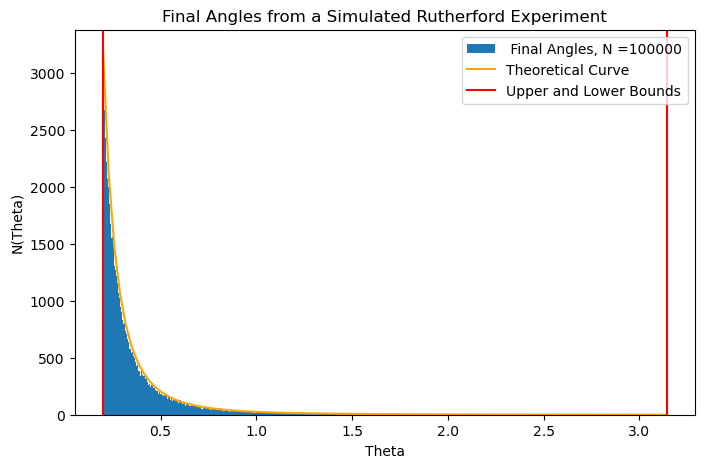

In [ ]:
def rutherford(r, n):
    bs = uniform(r, n)
    thetas = np.array([0.00] * n)
    for b in range(n):
        thetas[b] = 2 * mpmath.acot(bs[b])
    return thetas


def theoretical(n, theta):
    first = n/(10**2)
    second_top = np.cos(theta/2)
    second_bottom = np.sin(theta/2)**3
    return first * (second_top/second_bottom)


# Calculated Values
B = 10
theta_min = float(2 * mpmath.acot(B))
theta_theor = np.linspace(theta_min, np.pi, 100)

# This is the expected # of particles in the range 0-10 of the beam radius
x_sec_area = 100000 / (np.pi * B**2)
print(f'Expected # of particles in beam radius {B}: {x_sec_area}')

plt.figure(figsize = (8, 5))
plt.hist(rutherford(B, 100000), 1000, label = f' Final Angles, N ={100000}')
# Theoretical Curve
plt.plot(theta_theor, theoretical(x_sec_area, theta_theor), color = 'orange', label = 'Theoretical Curve')
plt.axvline(x = theta_min, color = 'r', label = 'Upper and Lower Bounds')
plt.axvline(x = np.pi, color = 'r')
plt.title('Final Angles from a Simulated Rutherford Experiment')
plt.xlabel('Theta')
plt.ylabel('N(Theta)')
plt.legend(loc = 'upper right')
plt.show()

This outgoing distribution graph shows the final angle that each particle will end up at on the detector. The graph is showing how the majority of the particles are deflected a relativly small amount onto the detector, while a few (from theta = 1-pi), get deflected a lot. The bounds of the histogram (theoretically) should be the minimum theta to the pi. This is because pi is the full 180 degree deflection while theta minimum is represented by particles that a not affected by the nucleus. Increasing the bin size and particle number accentuates the curve of the histogram. I was able to find the theoretical curve by assigning the x-values (thetas) to 100 evenly spaced floats between theta_min and pi. And the y-values to a theoretical function that is the defined as the dimensionless scattering distribution. The issue with the curve initially was the constant of integration not being readily visible. To find it I used the given function for the number of particles per cross sectional area. This value makes sense as a constant since it represents delta theta, since for each impact parameter, delta theta has to be added to the function to make it more accurate.

## Incoming Speed Modification

<font color = blue>
Now we want to modify the "beam" so that the particles in it have a range of speeds (non-dimensionalized) following the Gaussian distribution

$$
\mathcal{P}(v) \, dv = \frac{1}{\sigma\sqrt{\pi}} \, e^{-\frac{(v - 1)^2}{\sigma^2}} \, dv
$$

and examine what effect this has on the final distribution of angles.

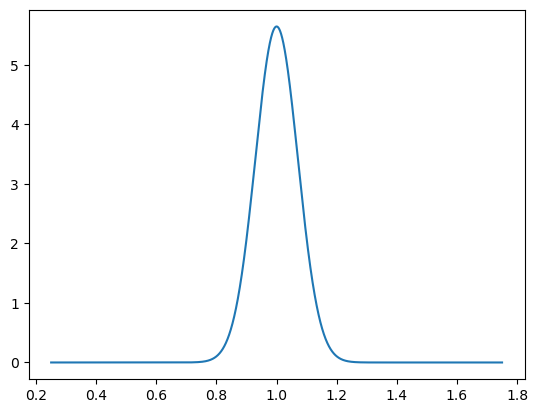

In [ ]:
def p(v, sig):
    first = 1 / (sig * np.sqrt(np.pi))
    e = np.exp(-(v-1)**2/(sig**2))
    return first * e

sig = .1
v = np.linspace(.25, 1.75, 100000)

plt.plot(v, p(v,sig))
plt.show()

### Gaussian Distribution of Speeds

<font color = blue>
    
Create a function to generate a set of incoming speeds that follow a Gaussian distribution.  Your function should take two inputs: the total number of speeds you want to generate, and the width $\sigma$ of the distribution.  It should also never allow a speed to be generated that is less than zero.  Test your function by generating a list of 100000 particle speeds, using $\sigma = .1$.  Plot the results as a histogram, and confirm that the shape is correct (using the same process you followed for the previous two histograms).

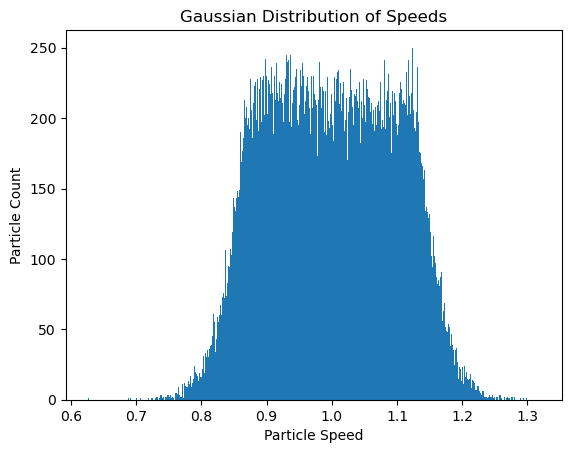

In [ ]:
def gauss_v(vnum, sig):
    speeds = []
    while len(speeds) < vnum:
        v = np.random.uniform(0, 5)
        prob = p(v, sig)
        if np.random.rand() < prob:
            speeds.append(v)
    return np.array(speeds)

plt.hist(gauss_v(100000, .1), 1000)
plt.ylabel('Particle Count')
plt.xlabel('Particle Speed')
plt.title('Gaussian Distribution of Speeds')
plt.show()

### * Modifed Rutherford Distribution

<font color = blue>
    
Create a function that uses the previous functions for generating impact parameters and speeds to generate a list of final angles.  Test it out using 100000 particles, with a beam radius of 10 and $\sigma = 0.1$.  Show the resulting histogram together with the histogram where we assume all particles have the same speed.  Don't forget to **discuss** your results!

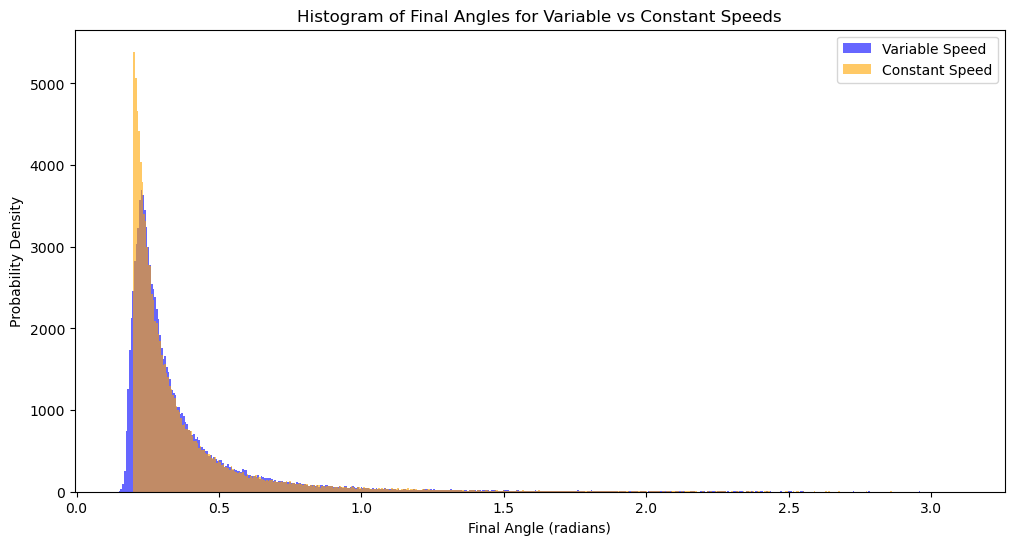

In [ ]:
def rutherford_dist(r, n, sig):
    bs = uniform(r, n)
    speeds = gauss_v(n, sig)
    thetas = np.array([0.00] * n)
    for i in range(n):
        thetas[i] = 2 * mpmath.acot(bs[i] / speeds[i])
    return np.array([float(theta) for theta in thetas])

def rutherford_constant_v(r, n, constant_v):
    bs = uniform(r, n)
    thetas = np.array([0.00] * n)
    for i in range(n):
        thetas[i] = 2 * mpmath.acot(bs[i] / constant_v)
    return np.array([float(theta) for theta in thetas])

n = 100000
r = 10
sig = .1
constant_v = 1

final_angles_variable = rutherford_dist(r, n, sig)
final_angles_constant = rutherford_constant_v(r, n, constant_v)

plt.figure(figsize=(12, 6))
plt.hist(final_angles_variable, 500, color='b', label="Variable Speed", alpha = .6)
plt.hist(final_angles_constant, 500, color='orange', label="Constant Speed", alpha = .6)
plt.title('Histogram of Final Angles for Variable vs Constant Speeds')
plt.xlabel('Final Angle (radians)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

The histogram above shows the the final angles on the detector after 100000 particles are beamed at a nucleus. The orange part of the histogram represents the probability density of the particle's final angles with a constant speed. The blue part is variable speed particles, they are more accurate since the lowest value thetas are not all the same value.

## Minimization Functions

### Fixed Number of Steps of Fixed Width

#### Stepping Code

<font color = blue>
    
Begin by writing a function which takes as inputs a function `function`, an initial value `x_initial`, the number of steps to be taken `step_count`, a small parameter `epsilon` (for use in the numerical derivative) and another small parameter `step` (the fixed step size).  Your function should output an array of `step_count` values of the function as it is moved towards its minimum.

In [ ]:
def minimize(f, x_initial, step_count, eps, step):
    min_count = np.array([0.00]*(step_count+1))
    f_x = np.array([0.00]*(step_count))
    min_count[0] = x_initial

    for i in range(step_count):
        x = min_count[i]
        f_prime = (f(x + eps) - f(x)) / eps
        sign = f_prime / np.abs(f_prime)
        min_count[i+1] = x - (step * sign)
        f_x[i] = f(min_count[i+1])


    return f_x

#### Testing

<font color = blue>
    
We want to test this code on the function
    $$F(x) = \frac{1}{x^2} - \frac{10}{x}e^{-x}$$
 Create the function, and plot it.  Use the plot to choose a good initial value `x_initial`.


Then, run your function using `epsilon` = $10^{-6}$, and a step size of $10^{-4}$, for a value of `step_count` you choose.

Plot the results (you want to plot "$k$" vs. "$\mathrm{function}(x_k)$").  Adjust your value of `step_count` until it is optimal: your graph should more-or-less monatonically decrease until it reaches some value, and then essentially stay there.  You will want to make sure `step_count` is large enough that the function has "bottomed out", but not unnecessarily large.

Then, create second graph in which you "zoom in" on the later data points, so that you can see the results "rattling" around near the bottom of the potential.

**Discuss** the processes you went through and the results.

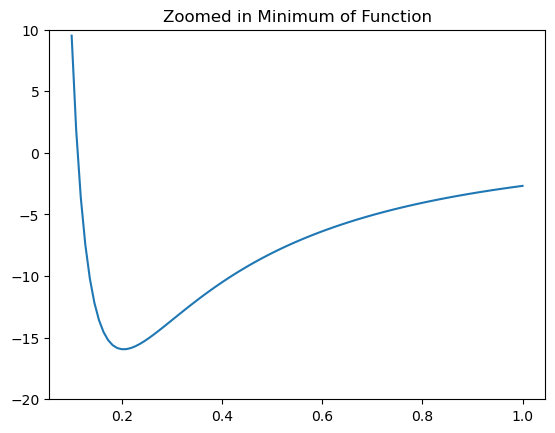

In [ ]:
def f(x):
    return 1/(x**2) - (10/x)*np.exp(-x)

x = np.linspace(.1, 1, 100)

plt.plot(x, f(x))
plt.title('Zoomed in Minimum of Function')
plt.ylim(-20, 10)
plt.show()

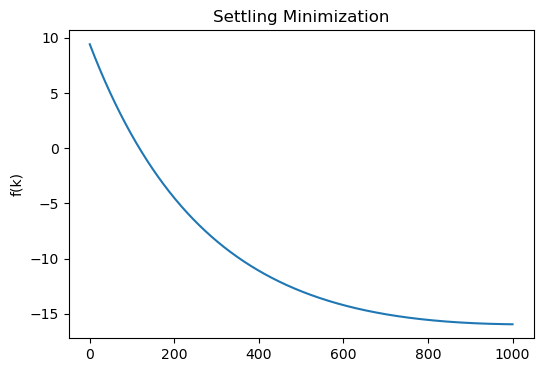

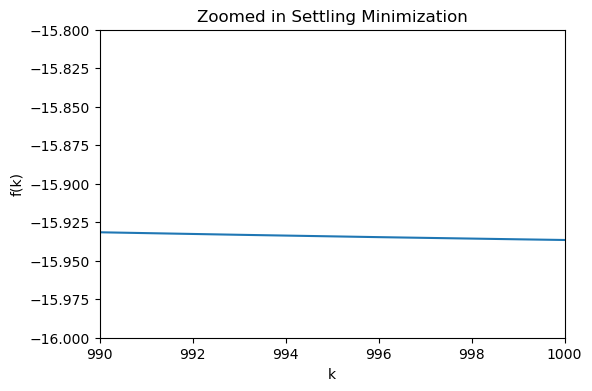

In [ ]:
step_count = 1000

k = np.linspace(0, step_count, step_count)
f_k = minimize(f, .1, step_count, 10**(-6), 10**(-4))

plt.figure(figsize = (6,4))
plt.plot(k, f_k)
plt.title('Settling Minimization')
plt.ylabel('f(k)')

plt.figure(figsize = (6,4))
plt.plot(k, f_k)
plt.title('Zoomed in Settling Minimization')
plt.xlabel('k')
plt.ylabel('f(k)')
plt.ylim(-16,-15.8)
plt.xlim(990,1000)

plt.show()

The two graphs above show the minimization function "zeroing in" on the minimum in the range assigned above. The top graph shows that after 1000 iterations (step_count), the function begins to "rattle" at the lowest value. The bottom graph shows a near horizontal line about where the minimum of the function is. In order to do this I took the given step and epsilon values, and after graphing the function I was able to determine a valid initial starting x-value. The minimization iterates over the step_count variable using the derivative and the sign of the f(x) value to determine how to step down the function by the step interval.

### With Adaptive Stepping

#### Steppping Code

<font color = blue>
    
Now write a new version of the function which implements adaptive stepping, with a tolerance value used as the exit condition.  This time your code should take as inputs the tolerance parameter `step_min` (instead of the number of steps), the initial step size `step_initial` (instead of the fixed step size), and two parameters `modify_plus` and `modify_minus`, which we will use to modify the step size after each step.  (It should also still take the function  and the parameter $\epsilon$ associated with the numerical derivative as inputs).  In addition, modify the output of the function so it also includes an array of step sizes.

You may want to do this in two stages:  first, keep the number of steps fixed and just put in the adaptation of step size.  Test the code to make sure it's working.  Then, make the modification to use the tolerance minimum step size as your exit condition.

In [ ]:
def adap_step(f, x_initial, step_initial, step_min, modify_plus, modify_minus, eps):
    x_array = np.array([x_initial])
    f_array = np.array([])
    step_vals = np.array([])
    step = step_initial
    i = 0
    while step_min < step:
        x = x_array[i]
        f_prime = (f(x + eps) - f(x)) / eps
        sign = f_prime / np.abs(f_prime)
        x_array = np.append(x_array, x - (step * sign))
        if f(x_array[i+1]) < f(x):
            step = modify_plus * step
        else:
            step = modify_minus * step

        f_array = np.append(f_array, f(x_array[i+1]))
        step_vals = np.append(step_vals, step)
        i = i + 1
    return f_array, step_vals

#### Testing

<font color = blue>
    
Test your new function with the same function F(x) as before.  Use the values `modify_plus` = 1.1 and `modify_minus` = 0.5 for your multiplication factors, along with `epsilon` = $10^{-6}$ for the numerical derivative and an initial step size of `step_initial` = $10^{-4}$.  Set your tolerance minimum step size to be `step_min` = $10^{-6}$.  

Again, plot your result as $k$ vs. $F(x_k)$, and then plot a "zoomed in" version that examines the last portion of the stepping process.

Then, create a third plot, which shows the step size as a function of $k$.

**Discuss** what you see in this analysis thoroughly.

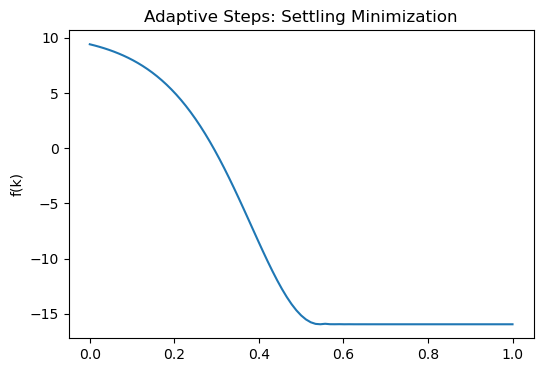

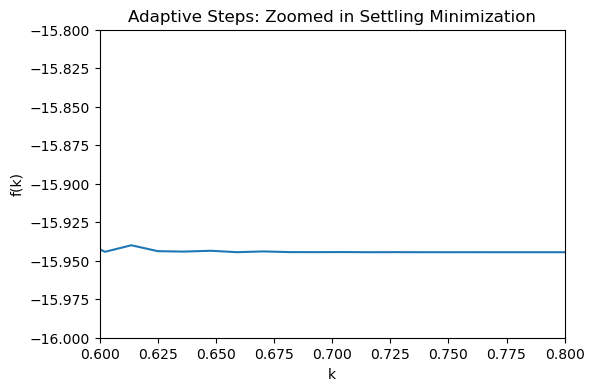

In [ ]:
k = np.linspace(0, 1, 89)
f_k = adap_step(f, .1, 10**(-4), 10**(-6), 1.1, .5, 10**(-6))

plt.figure(figsize = (6,4))
plt.plot(k, f_k[0])
plt.title('Adaptive Steps: Settling Minimization')
plt.ylabel('f(k)')

plt.figure(figsize = (6,4))
plt.plot(k, f_k[0])
plt.title('Adaptive Steps: Zoomed in Settling Minimization')
plt.xlabel('k')
plt.ylabel('f(k)')
plt.ylim(-16,-15.8)
plt.xlim(.6,.8)

plt.show()

It seems as though with the adaptive stepping, the function's minimum is determined significantly faster. The very small initial step value allows the function to not alter a large amount and therefore find the minimum a lot quicker. The bottom graph appears as if it is more specific then the initial function with no adaptive stepping.

#### A Cleaner Version

<font color = blue>
    
The reason we built and output the arrays of values in the previous two algorithms was so that we could examine and better understand the differences between those algorithms.  But now that we have done that, it is better to dispense with these.

Create a more stream-lined version of the adaptive stepping function in which these arrays are never created.  Have this new version output just the final location $x_k$ (the best estimate of the location of the minimum).

Don't forget to make sure you are still getting correct results!

In [ ]:
def clean_adap(f, x_initial, step_initial, step_min, modify_plus, modify_minus, eps):
    x_array = np.array([x_initial])
    i = 0
    while step_min < step_initial:
        f_prime = (f(x_array[i] + eps) - f(x_array[i])) / eps
        sign = f_prime / np.abs(f_prime)
        x_array = np.append(x_array, x_array[i] - (step_initial * sign))
        if f(x_array[i + 1]) < f(x_array[i]):
            step_initial = modify_plus * step_initial
        else:
            step_initial = modify_minus * step_initial
        i = i + 1
    return f(x_array[-1])

print(f'Local Minimum of f(x): {clean_adap(f, .1, 10**(-4), 10**(-6), 1.1, .5, 10**(-6))}')

Local Minimum of f(x): -15.944478663160545


It works cleanly now!

### Multi-Variable Functions

<font color = blue>
    
Now we want to try using the same method, but with a function of multiple variables.  We will assume an input of the form $F([x_1, x_2, \dots, x_k])$ (notice that our function has a single input, which is itself an array of values: this is easier to manipulate than if we assumed it was in the form $F(x_1, x_2, \dots, x_k)$, where the function has multiple inputs.

#### Numerical Gradient Code

<font color = blue>
    
We'll begin by writing a function which takes as input the `function`, our numerical derivative parameter `epsilon`, and an array of values `vector` (in the form $[x_1, x_2, \dots, x_m]$), and outputs the numerical gradient (which should also be an array of $m$ values).

Your code should not depend on knowing ahead of time what the value of $m$ (how many components your input vector should have).

Recall that the numerical gradient vector should have the form:
    
$$\Bigg[\frac{F([x_1+\epsilon, x_2, \dots, x_m]) - F([x_1, x_2, \dots, x_m])}{\epsilon}, \ \ \frac{F([x_1, x_2 + \epsilon, \dots, x_m]) - F([x_1, x_2, \dots, x_m])}{\epsilon} \ \ , \dots, \ \ \frac{F([x_1, x_2, \dots, x_m + \epsilon]) - F([x_1, x_2, \dots, x_m])}{\epsilon}\Bigg]$$


Test your code on the function
$$
F(x, y, z) = x^2 + y^4 + z^6
$$
at the location $x = 1$, $y = 2$, $z = 3$.  

(As a **discussion**, Compute the gradient analytically, and compare your result, using the value $\epsilon = 10^{-6}$.)

In [ ]:
def f(x,y,z):
    return x**2 + y**4 + z**6


def gradient(f, eps, vector):
    grad_array = np.zeros_like(vector)
    for i in range(len(vector)):
        original_value = vector[i]
        vector[i] = original_value + eps
        sep_vec = f(vector[0], vector[1], vector[2])
        vector[i] = original_value
        original_value_f = f(vector[0], vector[1], vector[2])
        grad_array[i] = (sep_vec - original_value_f) / eps

    return grad_array

v = np.array([1.00, 2.00, 3.00])
gradient(f, 10**(-6), v)

array([   2.00000102,   32.00002402, 1458.00121516])

The function is $ f(x, y, z) = x^2 + y^4 + z^6 $.

The gradient of $ f(x, y, z)$ is:
\[
$\nabla f(x, y, z) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right) = \left( 2x, 4y^3, 6z^5 \right)$
\]

Evaluating the gradient at$(x, y, z) = (1, 2, 3) $:
\[
$\nabla f(1, 2, 3) = \langle 2, 32, 1458 \rangle $
\]

#### Stepping Code

<font color = blue>
    
Now we want to write a function which minimizes a function of multiple variables, using the final (cleaned up) version of your adaptive stepping function as a starting point.
    
The main difference to the code should be that instead of computing a numerical derivative, we use the function you just wrote to compute a numerical gradient.  And instead of simply determining the sign of the numerical derivative, we find the *unit vector* in the direction of the gradient.  To do so, you can use the `numpy` function `linalg.norm`.  

You should NOT have to rewrite your code to explicitly say that your locations $x_k$ are now actually arrays of numbers: if you simply use an input for $x_0$ that is itself an array of numbers, and that array of numbers is the right length to fit the function you are inputting, Python will take care of the rest...

In [ ]:
def clean_adap(f, x_initial, step_initial, step_min, modify_plus, modify_minus, eps):
    x_array = np.array([x_initial])
    def gradient(f, eps, vector):
        grad_array = np.zeros_like(vector)
        for i in range(len(vector)):
            original_value = vector[i]
            vector[i] = original_value + eps
            f_plus = f(vector)
            vector[i] = original_value
            f_original = f(vector)
            grad_array[i] = (f_plus - f_original) / eps
        return grad_array

    i = 0
    while step_initial > step_min:
        grad = gradient(f, eps, x_array[i])
        unit_grad = grad / np.linalg.norm(grad)
        x_new = x_array[i] - (step_initial * unit_grad)
        x_array = np.append(x_array, [x_new], axis=0)
        if f(x_new) < f(x_array[i]):
            step_initial = step_initial * modify_plus
        else:
            step_initial = step_initial * modify_minus

        i += 1

    return x_array[-1]

def f(x):
    return 1/(x[0]**2) - (10/x[0])*np.exp(-x[0])

v = np.array([.20])
result = clean_adap(f, v, 10**(-4), 10**(-6), 1.1, 0.5, 10**(-6))
print(f'Local Minimum of f(x): {result}')
print(f(result))

Local Minimum of f(x): [0.20369442]
-15.944478664102942


#### Testing

<font color = blue>
    We want to test the code on the function of two variables:
    $$
    V(x, y) = x\sin(x)\sin(y) + y\sin(1.1x)\cos(1.1y)
    $$

<font color = blue>
    
Begin by using the function `contourf` from the `matplotlib.pyplot` module to display the function as a contour plot.  (To do this you will first need to create a 2D array of values of the output of the function.  Then, you will need to create aditional 1D arrays of xvalues and yvalues.)

Use this contour plot to choose a good initial position vector, and then use your minimization code to find the minimum.  (Make sensible choices for all of your numerical parameters!)  Check the location of the minimum against the contour plot to confirm things have worked.

Then, repeat the process with a different initial position vector.

Local Minimum of f(x): [15.09605053 17.21682893]
Local Minimum of f(x): [17.93054421 14.23380412]


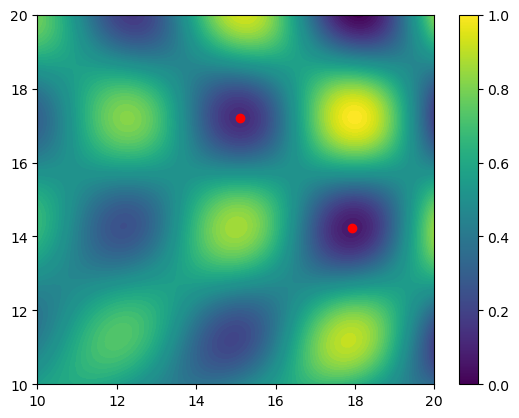

In [ ]:
def v(point):
    return point[0]*np.sin(point[0])*np.sin(point[1]) + point[1]*np.sin(1.1*point[0])*np.cos(1.1*point[1])

grid_count = 1000
x = np.linspace(10,20,grid_count)
y = np.linspace(10,20,grid_count)
v_list = np.array([np.array([0]*grid_count)]*grid_count)

for i in range(grid_count):
    for j in range(grid_count):
        v_list[j][i] = x[i]*np.sin(x[i])*np.sin(y[j]) + y[j]*np.sin(1.1*x[i])*np.cos(1.1*y[j])

vector1 = np.array([15.00, 17.00])
result1 = clean_adap(v, vector1, 10**(-4), 10**(-6), 1.1, 0.5, 10**(-6))
print(f'Local Minimum of f(x): {result1}')

vector2 = np.array([18.00, 14.00])
result2 = clean_adap(v, vector2, 10**(-4), 10**(-6), 1.1, 0.5, 10**(-6))
print(f'Local Minimum of f(x): {result2}')


plt.contourf(x,y, v_list, levels = 200)
plt.scatter(result1[0], result1[1], color = 'r') # Checking points
plt.scatter(result2[0], result2[1], color = 'r') # Checking points
plt.colorbar()
plt.show()


## *  Fitting to a Mystery Data Set

```
```

<font color = blue>
    
Previously, we used the function `curve_fit` from the `scipy.optimize` module to fit data to a curve.  Now, we want to create our own version of this function (that uses our minimizer code), and use it to analyze a mystery data set.

### Our Own Fitting Function

<font color = blue>
    
Create your own fitting function.  It should take as inputs "the data" (an array of x-values and an array of y-values), "the function" you want to fit to, and an array of initial guesses for parameters.  It should assume the function takes the form `function(x, parameters)`.  It should return an array of best-fit parameters, as well as the actual value of $\chi^2$ for these parameters.

Inside your function, you will want to define a simple function `chi_squared(parameters)`, which you can use your minimizer function on.

In a **discussion**, comment on any significant differences between your function and the `scipy.optimize` function you used before (based on just what you know: what its inputs and outputs are).  

In [ ]:
def fitting(x_vals, y_vals, f, parameters0):
    def chi2(parameters):
        chi2_vals = np.array([0.0]*len(y_vals))
        for i in range(len(y_vals)):
            chi2_vals[i] = (y_vals[i] - f(x_vals[i], parameters))**2
        return sum(chi2_vals)

    minimized_chi2 = clean_adap(chi2, parameters0, 10**(-4), 10**(-6), 1.1, 0.5, 10**(-6))

    return minimized_chi2

The main differnces between the curve_fit in scipy.optimize, and my fitting function is that mine also takes some "parameters0", what this does is "manually" inputs the values that the curve_fit function would find on its own. The outputs for my function and the curve_fit function will ultimatly be the same, it will be a list of x-values and y-values that are fitted to the curve given.

### Import and Visual Assessment of Data

<font color = blue>

Import the data file (stored on Nexus) "fittingdata.csv", and create a plot to display it.  Based on its appearance, choose a generic fitting function with one or more free parameters.  (Hint: make sure you have enough free parameters to account for everything you see).  Choose initial estimates for these parameters.

**Discuss** this analysis process and the choices you have made.

To do this, you may want to import the module `csv` and read documenation to establish how to use it.

I am using this to help me with the documentation and inputs: https://stackoverflow.com/questions/11126012/read-csv-and-separate-by-column

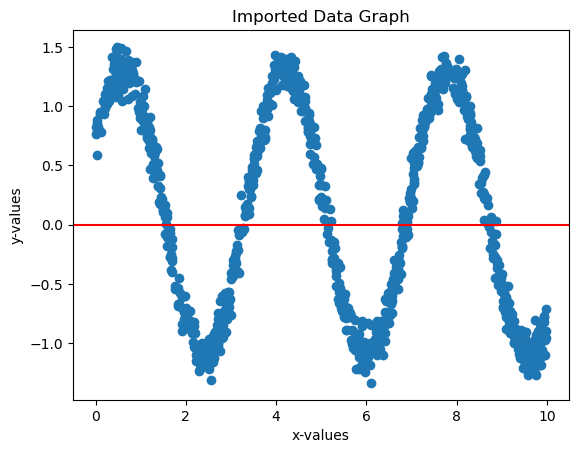

In [ ]:
with open("fittingdata.csv") as filein:
    reader = csv.reader(filein, skipinitialspace = True)
    xs, ys = zip(*reader) # Seperating the xs and ys from the string ['x', 'y']

xs = list(xs)
ys = list(ys)
for i in range(len(xs)):
    xs[i] = float(xs[i])
    ys[i] = float(ys[i])
plt.title('Imported Data Graph')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.scatter(xs, ys, label = 'Imported Data')
plt.axhline(y = 0, color = 'r')
plt.show()

Based on this graph above I beleive the best function to fit this graph with would be some sort of sin wave. The parameters I would choose from would probably be: amplitude, period, and phase shift. But I am going to leave out phase shift for now since its seems close to negligible. For amplitude my estimate would be 1.5, for the period my guess is 3.5.

### Performing the Fit

<font color = blue>

Based on your previous assessment, create the function you will use with your fitting code, and then perform the fit (also using your choices of parameter estimates).

In [ ]:
# params being a list of 4 values: amplitude, period, phase shift, vertical offset
def sin_func(x, params):
    return params[0] * np.sin((((2*np.pi) / params[1]) * x) + params[2]) + params[3]

#fit = fitting(xs, ys, sin_func, params)
#print(fit)

### Assessing the Fit

#### Plotting the Fit Function

<font color = blue>
    
Plot your resulting fit function together with the data, and (as a **discussion**) assess the results.

[1.20457116 3.59231351 0.49860176 0.09495225]


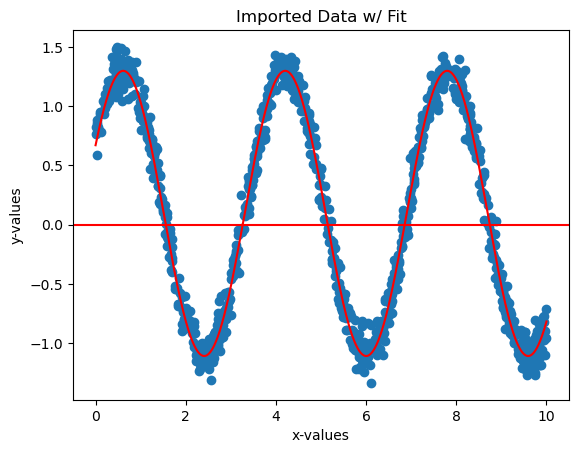

In [ ]:
amp = 1.1827
period = 3.4456
phase = .5
vert_offset = .25
params = [amp, period, phase, vert_offset]

fit = fitting(xs, ys, sin_func, params)
print(fit)

x = np.linspace(0, 10, 1000)
y = sin_func(x, fit)

plt.title('Imported Data w/ Fit')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.plot(x,y, color = 'r')
plt.scatter(xs, ys)
plt.axhline(y = 0, color = 'r')
plt.show()

The results look pretty accurate. I chose three variables: amplitude, period, and phase shift. The values that I chose were based off my observations and calculated from the fitting function above. Based on the residuals I will likley change the parameter values and maybe add another

#### Residuals

<font color = blue>
    Next plot the residuals: for each data point, find the difference between the $y$-coordinate of the fit function and the data point.  (If there appears to be a pattern to the residuals, this usually means you missed something when you constructed your fit function, and may need to go back and try again.

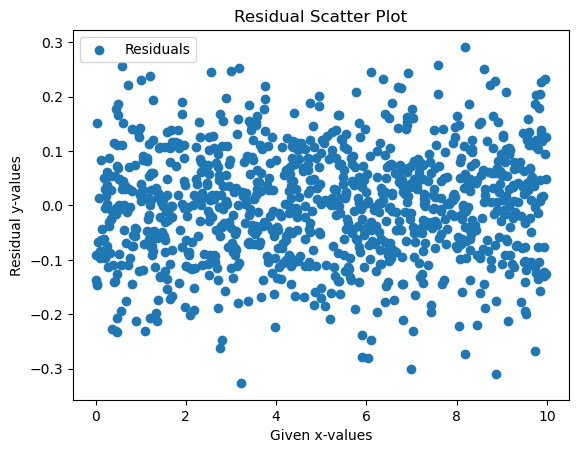

In [ ]:
y = np.array([0.00]*len(xs))
for i in range(len(xs)):
    y[i] = sin_func(xs[i], fit)

residuals = y - ys
plt.title('Residual Scatter Plot')
plt.xlabel('Given x-values')
plt.ylabel('Residual y-values')
plt.scatter(xs, residuals, label = 'Residuals')
plt.legend()
plt.show()

Looks pretty random to me!

#### Estimating Uncertainty

<font color = blue>

Then, find
    $$
    \tilde{\sigma} = \sqrt{\frac{\chi^2}{N}}
    $$
evaluated at your fitting parameters.  This provides an estimate for the amount of (assumed to be random!) uncertainty in each individual data point y-value.

In [ ]:

def chi2(parameters):
        chi2_vals = np.array([0.0]*1000)
        for i in range(len(ys)):
            chi2_vals[i] = (ys[i] - sin_func(xs[i], parameters))**2
        return sum(chi2_vals)

best_alphas = [1.20457116, 3.59231351, 0.49860176, 0.09495225]
n = len(xs)

uncert = np.sqrt(chi2(best_alphas)/n)
print(f'Estimated random uncertainty in each data y-value: {uncert}')

Estimated random uncertainty in each data y-value: 0.10168810418451021


# Any Other Problem

```
```

<font color = blue>
    
Come up with a physics problem (different from the ones analyzed above) that you can use either a Monte Carlo method or minimization to solve.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their signficance.

To paint a picture: I am a tightrope walker, and I am about to perform a stunt in which I walk a cable between two skyscrapers. A team of construction workers just put the cable up but I (obviously) cannot walk across it yet since it is still moving/swinging from the installation. I want to wait until the potential energy is at it's minimum, or the cable is at it's stable configuration. The goal of the below problem is to find the stable configuration of the cable and plot it after finding the position when it is at it's minimum potential energy.
**References**
https://numpy.org/doc/stable/reference/generated/numpy.clip.html
https://www.w3schools.com/python/python_variables_multiple.asp

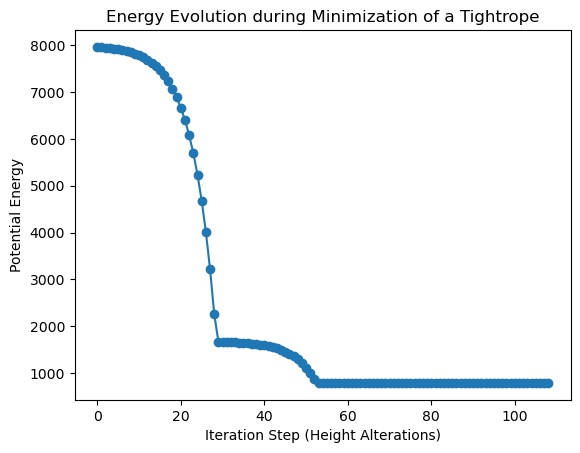

Final potential energy: 784.8000000000001


In [ ]:
g = 9.81
mass_per_length = 1.0
M_walker = 70.0
delta_x = 1.0

def potential_energy(heights):
    '''defines the potential energy of a tightrope
    the inputs are the initial heights which are also defined as a function (position of the rope across two buildings)'''
    U_rope = np.sum(mass_per_length * g * heights * delta_x)
    midpoint = len(heights) // 2
    U_walker = M_walker * g * heights[midpoint]

    return U_rope + U_walker

def clean_adap(f, x_initial, step_initial, step_min, modify_plus, modify_minus, eps):
    '''I had to redefine the clean_adap and gradient function to account for values that may be less than 0 since it
    doesnt make sense for this real life scenario, nor does it allow for a unit vector for the gradient.
    I also wanted to return the energy_history in addition to the normal last x-array value, so I could graph the energy history specifically'''
    x_array = np.array([x_initial])
    energy_history = [f(x_initial)]

    def gradient(f, eps, vector):
        '''I had to change the gradient vector to NOT allow for negative or 0 values of heights
        since the unit vector would return an error if so. '''
        grad_array = np.zeros_like(vector)
        for i in range(len(vector)):
            original_value = vector[i]
            vector[i] = original_value + eps
            f_plus = f(vector)
            vector[i] = original_value
            f_original = f(vector)
            grad_array[i] = (f_plus - f_original) / eps
        return grad_array

    i = 0
    while step_initial > step_min:
        grad = gradient(f, eps, x_array[i])
        grad_norm = np.linalg.norm(grad)
        if grad_norm == 0:
            print(f"Zero gradient at step {i}, stopping.")

        unit_grad = grad / grad_norm
        x_new = x_array[i] - (step_initial * unit_grad)
        x_new = np.clip(x_new, 1, 20) # cuts off values in the array i dont want to allow

        x_array = np.append(x_array, [x_new], axis=0)
        energy_history.append(f(x_new))

        if f(x_new) < f(x_array[i]):
            step_initial = step_initial * modify_plus
        else:
            step_initial = step_initial * modify_minus

        i += 1

    return x_array[-1], energy_history


N = 10
x_positions = np.linspace(0, 10, N)
initial_heights = 0.1 * (x_positions - 5)**2 + 10

final_heights, energy_history = clean_adap(potential_energy, initial_heights, 1e-2, 1e-6, 1.2, 0.7, 1e-5) # assigns both values to the clean_adap function so i can call both

plt.plot(energy_history, '-o')
plt.title('Energy Evolution during Minimization of a Tightrope')
plt.xlabel('Iteration Step (Height Alterations)')
plt.ylabel('Potential Energy')
plt.show()

print('Final potential energy:', potential_energy(final_heights))


The final output of the code shows the iteration steps vs. the potential energy of the cable. Each iteration represents a change in height and how the potential energy is affected. The x-axis was just a linspace array of 10 integers but the clean_adap function turns it into an array of arrays of values that represent the potential energy at those 10 heights. The initial_height variable represents what I guessed the tightrope would look like initially. If graphed it looks like a saggy rope, as if it was tied between two buildings. The final potential energy comes at around 56 iterations of the height. Physically, this means that the rope has reached an equillibruim state, in which small movements would not greatly effect the swing or position of the rope. The different "convergences" of the clean_adap function show how the potential energy changes over different heights and how the minimization function continues to work until the final value is found.